データ構造

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


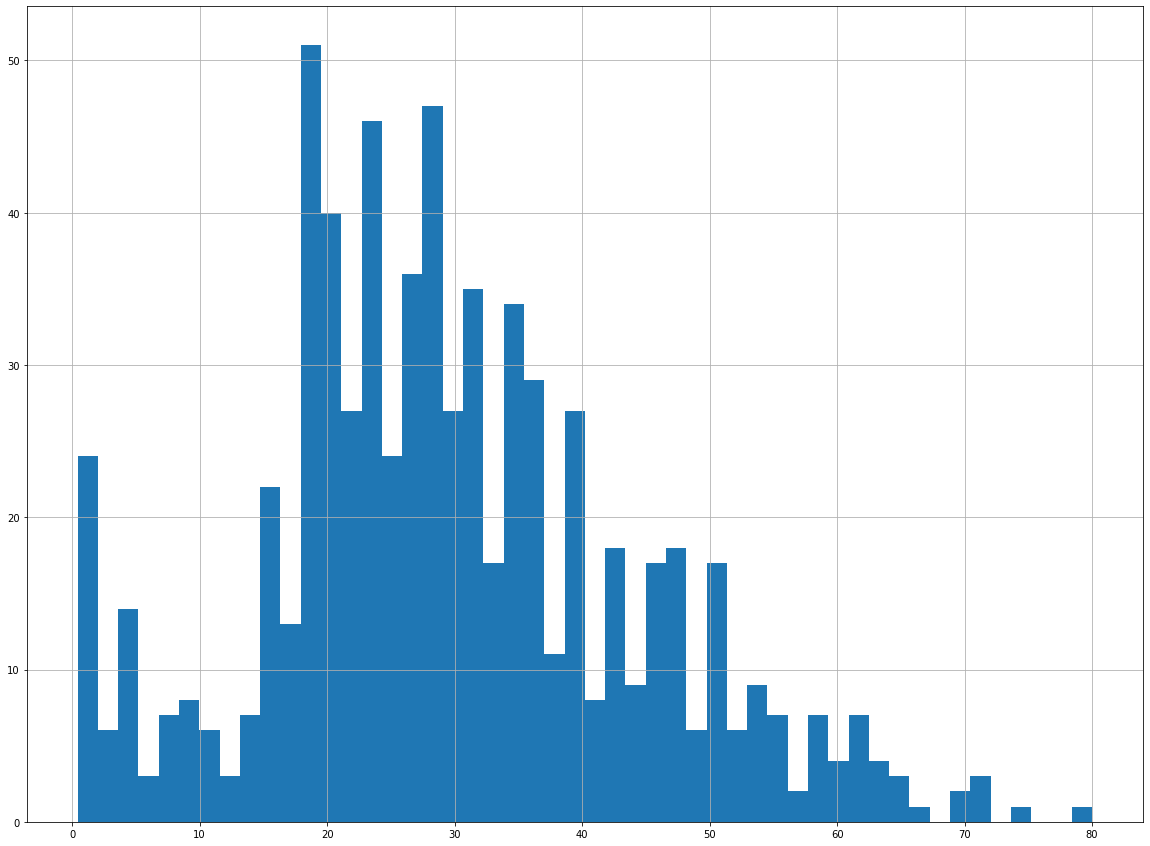

In [12]:
df["Age"].hist(bins=50, figsize=(20, 15));

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
df1 = df.copy()

In [141]:
df1["Cabin"] = df1["Cabin"].fillna(0)

In [142]:
df1.loc[df1["Cabin"]!=0, ["Cabin"]] = 1

In [146]:
df1 = df1.fillna(method="ffill")

In [143]:
df1 = df1.drop(["Name", "Ticket"], 1)

In [137]:
from sklearn.preprocessing import Imputer

In [ ]:
imputer = Imputer(strategy="median")
x = imputer.fit_transform(df1)
df1 = pd.DataFrame(x, columns=df1.columns)

In [90]:
#df1 = pd.get_dummies(df1)
#df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [101]:
df_cat = df["Embarked"]
df_cat_encoded, df_cat_categories = df_cat.factorize()
print(df_cat_encoded[:10])
print(df_cat_categories)

[0 1 0 0 0 2 0 0 0 1]
Index(['S', 'C', 'Q'], dtype='object')


In [118]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
df_cat_ohe = ohe.fit_transform(df_cat_encoded.reshape(-1,1))
df_cat_ohe = pd.DataFrame(df_cat_ohe)
df_cat_ohe.head()

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [105]:
import category_encoders as ce

In [124]:
list_cols = ["Sex", "Embarked"]
ce_ohe = ce.OneHotEncoder(cols=list_cols)
df1 = ce_ohe.fit_transform(df1)
df1.head()

,Sex_1,Sex_2,Sex_-1,Embarked_1,Embarked_2,Embarked_3,Embarked_-1,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,0,1,0,0,0,1,0,3,22.0,1,0,7.2500,0
1,0,1,0,0,1,0,0,2,1,1,38.0,1,0,71.2833,1
2,0,1,0,1,0,0,0,3,1,3,26.0,0,0,7.9250,0
3,0,1,0,1,0,0,0,4,1,1,35.0,1,0,53.1000,1
4,1,0,0,1,0,0,0,5,0,3,35.0,0,0,8.0500,0


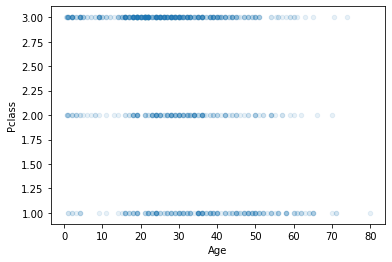

In [91]:
df1.plot(kind="scatter", x="Age", y="Pclass", alpha=0.1);

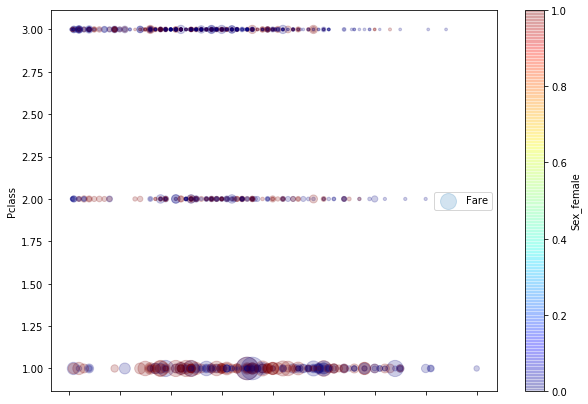

In [94]:
df1.plot(kind="scatter", x="Age", y="Pclass", alpha=0.2,
        s=df1["Fare"], label="Fare", figsize=(10,7),
        c="Sex_female", cmap=plt.get_cmap("jet"), colorbar=True,
        )
plt.legend();

In [95]:
corr_matrix = df1.corr()

In [96]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex_female     0.543351
Cabin          0.316912
Fare           0.257307
Embarked_C     0.171485
Parch          0.081629
Embarked_Q     0.008660
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.065571
Embarked_S    -0.155660
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64

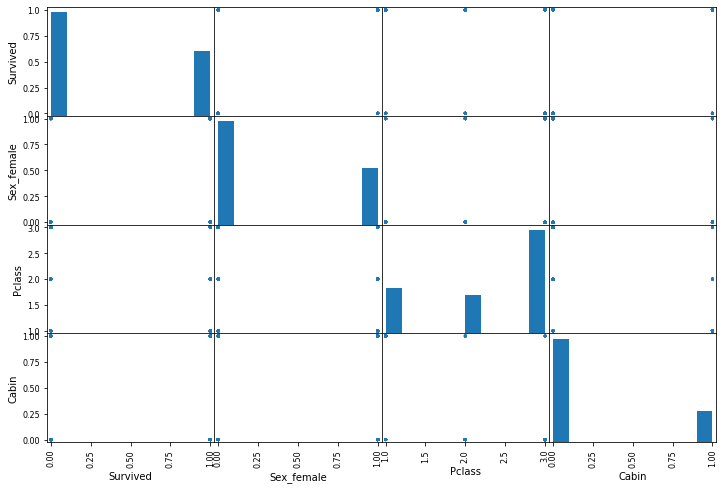

In [103]:
attributes = ["Survived", "Sex_female", "Pclass", "Cabin"]
from pandas.plotting import scatter_matrix
scatter_matrix(df1[attributes], figsize=(12, 8));

前処理

In [ ]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit()
x = imputer.transform()

In [ ]:
df1 = pd.DataFrame(x, columns=df.columns)

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
mmscaler = MinMaxScaler()
df_mm = mmscaler.fit_transform(df1)
df_mm = pd.DataFrame(df_mm, columns=df1.columns)
df_mm.head()

,Sex_1,Sex_2,Sex_-1,Embarked_1,Embarked_2,Embarked_3,Embarked_-1,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0


In [132]:
from sklearn.preprocessing import StandardScaler

In [135]:
sscaler = StandardScaler()
df_ss = sscaler.fit_transform(df1)
df_ss = pd.DataFrame(df_ss, columns=df1.columns)
df_ss.head()

,Sex_1,Sex_2,Sex_-1,Embarked_1,Embarked_2,Embarked_3,Embarked_-1,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0.737695,-0.737695,0.0,0.619306,-0.483810,-0.309743,0.0,-1.730108,-0.789272,0.827377,-0.521198,0.432793,-0.473674,-0.502445,-0.544925
1,-1.355574,1.355574,0.0,-1.614710,2.066928,-0.309743,0.0,-1.726220,1.266990,-1.566107,0.578729,0.432793,-0.473674,0.786845,1.835115
2,-1.355574,1.355574,0.0,0.619306,-0.483810,-0.309743,0.0,-1.722332,1.266990,0.827377,-0.246216,-0.474545,-0.473674,-0.488854,-0.544925
3,-1.355574,1.355574,0.0,0.619306,-0.483810,-0.309743,0.0,-1.718444,1.266990,-1.566107,0.372493,0.432793,-0.473674,0.420730,1.835115
4,0.737695,-0.737695,0.0,0.619306,-0.483810,-0.309743,0.0,-1.714556,-0.789272,0.827377,0.372493,-0.474545,-0.473674,-0.486337,-0.544925


In [136]:
from sklearn.pipeline import Pipeline

In [152]:
pipe = Pipeline([
    ("ce_ohe", ce.OneHotEncoder(cols=list_cols)),
    ("imputer", Imputer(strategy="median")),
    ("mmscaler", MinMaxScaler()),
])
df2 = pipe.fit_transform(df1)
df2 = pd.DataFrame(df2, columns=df.columns)

C:\Users\Sato\Anaconda3\envs\jupyterlab\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: Shape of passed values is (891, 15), indices imply (891, 12)

In [148]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0,S
1,2,1,1,female,38.0,1,0,71.2833,1,C
2,3,1,3,female,26.0,0,0,7.9250,0,S
3,4,1,1,female,35.0,1,0,53.1000,1,S
4,5,0,3,male,35.0,0,0,8.0500,0,S
